# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key
api_key = f'&APPID={api_key}'


#base url for API call
url = 'http://api.openweathermap.org/data/2.5/weather?q=' + api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../WeatherPy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
weather_url = 'http://api.openweathermap.org/data/2.5/weather?q=' 

#Create lists for the DF
New_Cities = []
Clouds = []
Dates = []
Humidities = []
Latitudes = []
Longitudes = []
Max_Temps = []
Wind_Speeds = []
Countries = []

#Set Counters
count_one = 0
set_one = 1

#Loops through to make DF columns & logger
for city in cities:
    try:
        response = requests.get(weather_url + city + api_key).json()
        Clouds.append(response['clouds']['all'])
        Countries.append(response['sys']['country'])
        Dates.append(response['dt'])
        Humidities.append(response['main']['humidity'])
        Latitudes.append(response['coord']['lat'])
        Longitudes.append(response['coord']['lon'])
        Max_Temps.append(response['main']['temp_max'])
        Wind_Speeds.append(response['wind']['speed'])
        
        if count_one > 48:
            count_one = 1
            set_one += 1
            New_Cities.append(city)
        else:
            count_one += 1
            New_Cities.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | dingle
Processing Record 3 of Set 1 | road town
Processing Record 4 of Set 1 | pangnirtung
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | airai
Processing Record 8 of Set 1 | naze
Processing Record 9 of Set 1 | touros
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | port blair
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | arlit
Processing Record 16 of Set 1 | bom jesus
Processing Record 17 of Set 1 | paamiut
Processing Record 18 of Set 1 | tunggol
Processing Record 19 of Set 1 | tefe
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | richards bay
Processing Record 22 of Set 1 | sitka
Processing Record 23 of Set 1 | holland
Processing Record 24 of Set 1 | sabha
P

In [31]:
#Put max temps list into array
Max_Temps_array = np.asarray(Max_Temps)

#Convert max temps from Kelvin to Fahrenheight
Max_Temps_Fahr = (Max_Temps_array-273.15)*1.8 +32
Max_Temps_Fahr

array([ 64.004,  82.922,  84.2  ,  27.518,  41.   ,  71.834,  88.43 ,
        72.734,  73.4  ,  30.2  ,  84.56 ,  42.8  ,  73.976,  64.994,
        84.398,  76.892,  32.954,  87.854,  74.264,  84.2  ,  70.412,
        68.   ,  39.2  ,  69.26 ,  55.004,  48.2  ,  77.   ,  29.084,
        70.25 ,  84.2  ,  66.992,  53.6  ,  83.768,  33.8  ,  60.8  ,
        57.2  ,  34.52 ,  70.016,  24.8  ,  32.   ,  63.05 ,  64.994,
        80.996,  37.256,  84.992,  23.828,  22.802,  38.714,  71.006,
        31.388,  17.168,  48.992,  75.614,  75.2  ,  41.   ,  55.4  ,
        66.2  ,  69.566,  56.984,  12.146,  53.636,  46.4  ,  53.474,
        60.8  ,  18.104,  77.594,  51.008,  83.354,  44.546,  28.4  ,
        64.004,  80.204,  64.184,  54.482,  44.006,  59.   ,  35.6  ,
        32.   ,  64.4  ,  71.06 ,  77.81 ,  28.4  ,  40.658,  80.6  ,
        46.796,  50.   ,  86.   ,  32.27 ,  59.   ,  83.462,  42.188,
        78.8  ,  77.   ,  73.4  ,  44.132,  95.216,  64.004,  37.166,
        77.81 ,  46.

In [32]:
#Create the DF
Weather_DF = pd.DataFrame({'City': New_Cities,
                           'Cloudiness': Clouds,
                           'Country': Countries,
                           'Date' : Dates,
                           'Humidity': Humidities,
                           'Lat': Latitudes,
                           'Lng': Longitudes,
                           'Max Temp': Max_Temps_Fahr,
                           'Wind Speed': Wind_Speeds})

#Preview DF
Weather_DF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port alfred,50,ZA,1571105447,81,-33.59,26.89,64.004,2.240
1,dingle,100,PH,1571105530,77,11.00,122.67,82.922,4.746
2,road town,1,VG,1571105577,78,18.42,-64.62,84.200,2.600
3,pangnirtung,100,CA,1571105464,62,66.15,-65.72,27.518,0.547
4,provideniya,90,RU,1571105557,75,64.42,-173.23,41.000,9.000


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
Weather_DF.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [42]:
#Print output data to csv
Weather_DF.to_csv(output_data_file, index_label= 'City_ID')

Weather_DF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port alfred,50,ZA,1571105447,81,-33.59,26.89,64.004,2.240
1,dingle,100,PH,1571105530,77,11.00,122.67,82.922,4.746
2,road town,1,VG,1571105577,78,18.42,-64.62,84.200,2.600
3,pangnirtung,100,CA,1571105464,62,66.15,-65.72,27.518,0.547
4,provideniya,90,RU,1571105557,75,64.42,-173.23,41.000,9.000


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

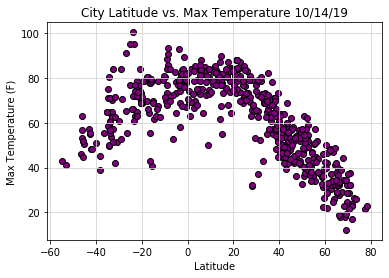

In [51]:
plt.scatter(Weather_DF["Lat"],Weather_DF["Max Temp"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Max Temperature "+ time.strftime('%x'))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,linestyle="-",color="lightgrey")
plt.savefig("Latitude_vs_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

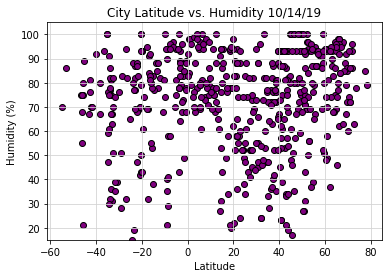

In [49]:
plt.scatter(Weather_DF["Lat"],Weather_DF["Humidity"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Humidity "+ time.strftime('%x'))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,linestyle="-",color="lightgrey")
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

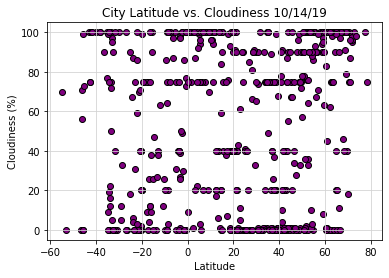

In [52]:
plt.scatter(Weather_DF["Lat"],Weather_DF["Cloudiness"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Cloudiness "+ time.strftime('%x'))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,linestyle="-",color="lightgrey")
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

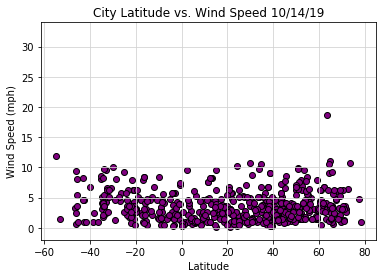

In [53]:
plt.scatter(Weather_DF["Lat"],Weather_DF["Wind Speed"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Wind Speed "+ time.strftime('%x'))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,linestyle="-",color="lightgrey")
plt.savefig("Latitude_vs_WindSpeed.png")
plt.show()
